<a href="https://colab.research.google.com/github/daniellegauthier/data-analysis/blob/main/world_expenditure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [14]:
gdp_world_file="annual gdp per capita world from world bank.xls"
gdp_world_df = pd.read_excel(gdp_world_file, header=3)
gdp_world_df.head(5)


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,-2.264869,-1.255589,1.121183,6.474909,1.876401,-2.743401,-24.084570,27.696865,10.553786,NaN
1,Africa Eastern and Southern,AFE,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,NaN,-2.143065,4.998781,2.786434,1.810404,2.234719,...,1.175570,0.203289,-0.530115,-0.004161,-0.006479,-0.488723,-5.316185,1.841882,0.985595,0.088484
2,Afghanistan,AFG,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.964803,-1.666416,-0.345802,-0.253594,-1.688577,0.932833,-5.364666,-22.966942,-8.586652,NaN
3,Africa Western and Central,AFW,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,NaN,-0.237313,1.529110,4.848730,3.125918,1.819129,...,3.089859,0.088258,-2.503645,-0.410204,0.168898,0.572955,-3.527789,1.385815,1.213857,0.782041
4,Angola,AGO,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,1.030729,-2.642975,-6.011891,-3.630695,-4.676670,-4.017114,-8.672432,-1.954598,-0.096755,-2.155077


In [10]:
military_world_file="military expenditure % of gdp world from world bank.xls"
military_world_df = pd.read_excel(military_world_file, header=3)
military_world_df.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,NaN,1.537008,2.091894,1.882361,2.456137,2.486424,...,1.759087,1.535199,1.274576,1.272376,1.118761,1.073977,1.102762,1.005835,1.000080,NaN
2,Afghanistan,AFG,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.298013,0.994576,0.956772,0.945227,1.006746,1.170968,1.358857,1.827934,NaN,NaN
3,Africa Western and Central,AFW,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,NaN,NaN,1.315351,1.314010,1.442316,1.468636,...,0.731363,0.677259,0.826473,0.822144,0.847022,0.801030,0.949690,1.164951,0.973350,NaN
4,Angola,AGO,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,4.698455,3.105426,2.733335,2.507983,1.955787,1.739070,1.700178,1.289923,1.328722,NaN


In [28]:
death_world_file="death rate world from world bank.xls"
death_world_df = pd.read_excel(death_world_file, header=3)
death_world_df.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,"Death rate, crude (per 1,000 people)",SP.DYN.CDRT.IN,6.594000,6.456000,6.394000,6.275000,6.250000,6.216000,...,7.729000,7.968000,8.336000,8.414000,8.59700,8.778000,9.690000,11.235000,11.084000,NaN
1,Africa Eastern and Southern,AFE,"Death rate, crude (per 1,000 people)",SP.DYN.CDRT.IN,20.918108,20.681404,20.393118,20.254634,19.808492,19.795559,...,8.475899,8.239619,7.973696,7.773413,7.58811,7.434644,7.620548,8.036899,7.840951,NaN
2,Afghanistan,AFG,"Death rate, crude (per 1,000 people)",SP.DYN.CDRT.IN,31.921000,31.349000,30.845000,30.359000,29.867000,29.389000,...,7.395000,7.331000,7.077000,7.027000,6.98100,6.791000,7.113000,7.344000,6.906000,NaN
3,Africa Western and Central,AFW,"Death rate, crude (per 1,000 people)",SP.DYN.CDRT.IN,26.363067,26.093769,25.643977,25.373806,25.151359,24.913831,...,11.544798,11.352476,11.113635,10.909012,10.71184,10.488748,10.601297,10.678952,10.264188,NaN
4,Angola,AGO,"Death rate, crude (per 1,000 people)",SP.DYN.CDRT.IN,26.659000,27.483000,27.211000,26.913000,26.582000,26.205000,...,9.181000,8.826000,8.555000,8.242000,7.99000,7.811000,7.821000,8.009000,7.863000,NaN


In [35]:
women_world_file="proportion of women in parliament world from world bank.xls"
women_world_df = pd.read_excel(women_world_file, header=3)
women_world_df.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,Proportion of seats held by women in national ...,SG.GEN.PARL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Proportion of seats held by women in national ...,SG.GEN.PARL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,25.746908,28.149710,28.989170,28.705923,28.771570,29.274564,30.128447,30.474788,30.523627,30.518059
2,Afghanistan,AFG,Proportion of seats held by women in national ...,SG.GEN.PARL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,27.710843,27.710843,27.710843,27.710843,NaN,27.868852,27.016129,27.016129,NaN,NaN
3,Africa Western and Central,AFW,Proportion of seats held by women in national ...,SG.GEN.PARL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,15.614157,15.084915,14.843750,15.279107,15.318471,15.398773,16.345271,17.824377,19.182782,20.767717
4,Angola,AGO,Proportion of seats held by women in national ...,SG.GEN.PARL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,36.818182,36.818182,36.818182,30.454545,30.454545,30.000000,30.000000,29.545455,33.636364,33.636364


In [15]:
# Calculate summary statistics
gdp_world_stats = gdp_world_df.describe(include='all')
gdp_world_stats


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
count,266,266,266,266,0.0,141.000000,149.000000,149.000000,149.000000,149.000000,...,257.000000,257.000000,256.000000,257.000000,258.000000,257.000000,256.000000,255.000000,249.000000,227.000000
unique,266,266,1,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Aruba,ABW,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,266,266,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,1.572323,2.868207,2.780517,4.043725,3.589403,...,1.902699,1.434782,1.834968,2.049258,1.838805,1.695464,-5.910670,5.187395,3.335303,2.090665
std,NaN,NaN,NaN,NaN,NaN,5.655309,4.675750,5.492380,5.300015,5.594558,...,3.210011,4.399445,3.622029,3.849307,2.861935,3.153436,8.185287,10.717852,5.959867,6.162659
min,NaN,NaN,NaN,NaN,NaN,-26.527644,-20.910074,-14.521498,-14.404949,-15.115017,...,-24.463161,-29.921761,-12.202835,-9.033697,-18.586782,-10.527483,-58.849775,-22.966942,-22.369886,-15.573180
25%,NaN,NaN,NaN,NaN,NaN,-0.423007,1.031062,0.179302,1.955533,0.919383,...,0.531824,0.076962,0.301911,0.510549,0.499429,0.066154,-8.222188,1.672024,1.283090,0.263300
50%,NaN,NaN,NaN,NaN,NaN,2.149275,2.467432,3.144946,4.359919,3.445832,...,1.957997,1.695060,1.942963,2.000317,1.896186,1.640188,-4.528772,4.414695,3.002576,1.537040
75%,NaN,NaN,NaN,NaN,NaN,4.386326,4.801439,4.765303,5.775657,5.105632,...,3.672770,3.527534,3.422258,3.828617,3.686701,3.124896,-2.418876,6.943412,4.968051,3.470488


In [16]:
military_world_stats = military_world_df.describe(include='all')
military_world_stats

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
count,266,266,266,266,78.000000,89.000000,99.000000,104.000000,106.000000,107.000000,...,200.000000,195.000000,197.000000,197.000000,199.000000,196.000000,196.000000,197.000000,194.000000,0.0
unique,266,266,1,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Aruba,ABW,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,266,266,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,3.478986,3.218632,3.349309,3.180219,3.246079,3.336451,...,1.999643,1.956785,1.900178,1.852942,1.790842,1.818917,1.935736,1.852962,1.980269,NaN
std,NaN,NaN,NaN,NaN,2.861311,2.493265,2.650364,2.393290,2.225593,2.228118,...,1.753501,1.640822,1.446379,1.335717,1.251401,1.214086,1.328016,1.236275,2.583611,NaN
min,NaN,NaN,NaN,NaN,0.673509,0.230825,0.113290,0.206490,0.000039,0.296956,...,0.035933,0.052204,0.048225,0.049269,0.088094,0.082073,0.161615,0.110134,0.069184,NaN
25%,NaN,NaN,NaN,NaN,1.906422,1.702908,1.835543,1.724612,1.892964,1.731869,...,1.040083,1.066976,1.068991,1.080842,1.066933,1.107781,1.118940,1.076190,1.051577,NaN
50%,NaN,NaN,NaN,NaN,2.616056,2.364066,2.567568,2.631477,2.883261,3.098346,...,1.566864,1.535199,1.472531,1.536426,1.473991,1.569381,1.673384,1.543694,1.516930,NaN
75%,NaN,NaN,NaN,NaN,3.858485,3.765266,3.990597,3.888998,3.810301,3.974546,...,2.241420,2.261590,2.224985,2.165815,2.140242,2.186053,2.344134,2.227770,2.274773,NaN


In [29]:
# Calculate summary statistics
death_world_stats = death_world_df.describe(include='all')
death_world_stats

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
count,266,266,266,266,254.000000,253.000000,254.000000,253.000000,253.000000,253.000000,...,263.000000,262.000000,263.000000,262.000000,263.000000,263.000000,262.000000,261.000000,263.000000,0.0
unique,266,266,1,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Aruba,ABW,"Death rate, crude (per 1,000 people)",SP.DYN.CDRT.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,266,266,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,16.121398,15.573211,15.192001,14.960859,14.596538,14.403114,...,7.730445,7.752737,7.666199,7.662500,7.615743,7.597522,8.150818,8.748669,8.324800,NaN
std,NaN,NaN,NaN,NaN,6.717626,6.570046,6.445501,6.428059,6.283043,6.298419,...,2.565948,2.545367,2.477074,2.499653,2.473765,2.443551,2.716210,3.122730,2.860193,NaN
min,NaN,NaN,NaN,NaN,5.700000,5.800000,5.800000,5.600000,5.300000,5.000000,...,0.948000,1.014000,0.991000,0.985000,0.982000,0.991000,1.219000,1.311000,1.080000,NaN
25%,NaN,NaN,NaN,NaN,10.071351,9.900000,9.905750,9.700000,9.400000,9.300000,...,6.132674,6.198091,6.311500,6.149500,6.193500,6.141000,6.404000,6.799000,6.583500,NaN
50%,NaN,NaN,NaN,NaN,15.015692,14.240000,13.334304,13.068000,12.666666,12.200000,...,7.447000,7.409000,7.340000,7.266090,7.227229,7.233862,7.638694,8.300891,7.919000,NaN
75%,NaN,NaN,NaN,NaN,21.170194,20.509000,20.019250,19.671000,19.027810,19.004000,...,9.363500,9.250000,9.200000,9.100000,8.903000,8.800000,9.418750,9.940825,9.595000,NaN


In [39]:
# Calculate summary statistics
women_world_stats = women_world_df.describe(include='all')
women_world_stats

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
count,266,266,266,266,0.0,0.0,0.0,0.0,0.0,0.0,...,235.000000,237.000000,240.000000,238.000000,239.000000,240.000000,238.000000,237.000000,235.000000,234.000000
unique,266,266,1,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Aruba,ABW,Proportion of seats held by women in national ...,SG.GEN.PARL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,266,266,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.243500,20.763526,21.068114,21.511998,22.047856,22.826561,23.909744,24.675921,25.156238,25.461774
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.902441,10.993460,10.925275,10.631324,10.840714,11.255560,11.213458,11.800359,11.616928,11.635023
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.144604,13.274336,13.723045,13.731618,15.004873,15.395234,16.691617,17.021934,17.438822,17.641666
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19.310345,20.000000,20.111370,20.796784,21.212121,21.830501,23.125000,24.212963,25.069380,25.363607
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25.890625,26.666667,27.696942,27.996894,27.998658,29.319909,30.000000,32.363636,32.724056,33.054588


In [69]:
print(gdp_world_df.describe())

       1960        1961        1962        1963        1964        1965  \
count   0.0  141.000000  149.000000  149.000000  149.000000  149.000000   
mean    NaN    1.572323    2.868207    2.780517    4.043725    3.589403   
std     NaN    5.655309    4.675750    5.492380    5.300015    5.594558   
min     NaN  -26.527644  -20.910074  -14.521498  -14.404949  -15.115017   
25%     NaN   -0.423007    1.031062    0.179302    1.955533    0.919383   
50%     NaN    2.149275    2.467432    3.144946    4.359919    3.445832   
75%     NaN    4.386326    4.801439    4.765303    5.775657    5.105632   
max     NaN   22.113903   27.656089   32.168302   40.036296   42.016075   

             1966        1967        1968        1969  ...        2014  \
count  154.000000  158.000000  160.000000  160.000000  ...  257.000000   
mean     2.394178    1.784922    3.947626    4.556312  ...    1.902699   
std      4.290885    6.799573    7.339032    4.525453  ...    3.210011   
min    -10.550791  -17.50031

In [70]:
print(military_world_df.describe())

            1960       1961       1962        1963        1964        1965  \
count  78.000000  89.000000  99.000000  104.000000  106.000000  107.000000   
mean    3.478986   3.218632   3.349309    3.180219    3.246079    3.336451   
std     2.861311   2.493265   2.650364    2.393290    2.225593    2.228118   
min     0.673509   0.230825   0.113290    0.206490    0.000039    0.296956   
25%     1.906422   1.702908   1.835543    1.724612    1.892964    1.731869   
50%     2.616056   2.364066   2.567568    2.631477    2.883261    3.098346   
75%     3.858485   3.765266   3.990597    3.888998    3.810301    3.974546   
max    20.396745  16.507077  18.145500   17.118513   14.842176   13.409905   

             1966        1967        1968        1969  ...        2014  \
count  105.000000  110.000000  119.000000  118.000000  ...  200.000000   
mean     3.409082    3.637793    3.591768    3.516320  ...    1.999643   
std      2.676870    3.071507    3.238662    2.902567  ...    1.753501   
m

In [71]:
print(death_world_df.describe())

             1960        1961        1962        1963        1964        1965  \
count  254.000000  253.000000  254.000000  253.000000  253.000000  253.000000   
mean    16.121398   15.573211   15.192001   14.960859   14.596538   14.403114   
std      6.717626    6.570046    6.445501    6.428059    6.283043    6.298419   
min      5.700000    5.800000    5.800000    5.600000    5.300000    5.000000   
25%     10.071351    9.900000    9.905750    9.700000    9.400000    9.300000   
50%     15.015692   14.240000   13.334304   13.068000   12.666666   12.200000   
75%     21.170194   20.509000   20.019250   19.671000   19.027810   19.004000   
max     36.098000   35.935000   35.629000   36.509000   34.277000   35.940000   

             1966        1967        1968        1969  ...        2014  \
count  254.000000  253.000000  253.000000  253.000000  ...  263.000000   
mean    14.106434   13.867231   13.665993   13.536518  ...    7.730445   
std      6.307939    6.198515    6.047485    6.0

In [72]:
print(women_world_df.describe())

       1960  1961  1962  1963  1964  1965  1966  1967  1968  1969  ...  \
count   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
mean    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
std     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
min     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
25%     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
50%     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
75%     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
max     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   

             2014        2015        2016        2017        2018        2019  \
count  235.000000  237.000000  240.000000  238.000000  239.000000  240.000000   
mean    20.243500   20.763526   21.068114   21.511998   22.047856   22.826561   
std     10.902441   10.993460   10.925275   10.631324   10.840714   11.255560   
min      

In [22]:
# Melt the DataFrame
melted_gdp_world_df = gdp_world_df.melt(id_vars='Country Name', value_vars=gdp_world_df.columns[4:68], var_name='Year', value_name='Growth %')
melted_gdp_world_df

,Country Name,Year,Growth %
0,Aruba,1960,NaN
1,Africa Eastern and Southern,1960,NaN
2,Afghanistan,1960,NaN
3,Africa Western and Central,1960,NaN
4,Angola,1960,NaN
...,...,...,...
17019,Kosovo,2023,4.026981
17020,"Yemen, Rep.",2023,NaN
17021,South Africa,2023,-0.265253
17022,Zambia,2023,2.992084


In [26]:
melted_military_world_df = military_world_df.melt(id_vars='Country Name', value_vars=military_world_df.columns[4:68], var_name='Year', value_name='GDP %')
melted_military_world_df

,Country Name,Year,GDP %
0,Aruba,1960,NaN
1,Africa Eastern and Southern,1960,NaN
2,Afghanistan,1960,NaN
3,Africa Western and Central,1960,NaN
4,Angola,1960,NaN
...,...,...,...
17019,Kosovo,2023,NaN
17020,"Yemen, Rep.",2023,NaN
17021,South Africa,2023,NaN
17022,Zambia,2023,NaN


In [32]:
melted_death_world_df = death_world_df.melt(id_vars='Country Name', value_vars=death_world_df.columns[4:68], var_name='Year', value_name='Death Rate')
melted_death_world_df

,Country Name,Year,Death Rate
0,Aruba,1960,6.594000
1,Africa Eastern and Southern,1960,20.918108
2,Afghanistan,1960,31.921000
3,Africa Western and Central,1960,26.363067
4,Angola,1960,26.659000
...,...,...,...
17019,Kosovo,2023,NaN
17020,"Yemen, Rep.",2023,NaN
17021,South Africa,2023,NaN
17022,Zambia,2023,NaN


In [40]:
melted_women_world_df = women_world_df.melt(id_vars='Country Name', value_vars=women_world_df.columns[4:68], var_name='Year', value_name='Women')
melted_women_world_df

,Country Name,Year,Women
0,Aruba,1960,NaN
1,Africa Eastern and Southern,1960,NaN
2,Afghanistan,1960,NaN
3,Africa Western and Central,1960,NaN
4,Angola,1960,NaN
...,...,...,...
17019,Kosovo,2023,NaN
17020,"Yemen, Rep.",2023,0.000000
17021,South Africa,2023,45.864662
17022,Zambia,2023,14.970060


In [57]:
melted_gdp_world_df = gdp_world_df.melt(id_vars='Country Name', value_vars=gdp_world_df.columns[4:68], var_name='Year', value_name='Growth %')

# Find the maximum value and its index
max_gdp = melted_gdp_world_df['Growth %'].max()
max_gdp_index = melted_gdp_world_df[melted_gdp_world_df['Growth %'] == max_gdp].index[0]

# Print the entire row
print(melted_gdp_world_df.iloc[max_gdp_index])

# Find the minimum value and its index
min_gdp = melted_gdp_world_df['Growth %'].min()
min_gdp_index = melted_gdp_world_df[melted_gdp_world_df['Growth %'] == min_gdp].index[0]

# Print the entire row
print(melted_gdp_world_df.iloc[min_gdp_index])

Country Name         Libya
Year                  2021
Growth %        150.431471
Name: 16358, dtype: object
Country Name         Iraq
Year                 1991
Growth %       -64.425841
Name: 8359, dtype: object


In [58]:
melted_military_world_df = military_world_df.melt(id_vars='Country Name', value_vars=military_world_df.columns[4:68], var_name='Year', value_name='GDP %')

# Find the maximum value and its index
max_military = melted_military_world_df['GDP %'].max()
max_military_index = melted_military_world_df[melted_military_world_df['GDP %'] == max_military].index[0]

# Print the entire row
print(melted_military_world_df.iloc[max_military_index])

# Find the minimum value and its index
min_military = melted_military_world_df['GDP %'].min()
min_military_index = melted_military_world_df[melted_military_world_df['GDP %'] == min_military].index[0]

# Print the entire row
print(melted_gdp_world_df.iloc[min_military_index])

Country Name        Kuwait
Year                  1991
GDP %           117.349823
Name: 8373, dtype: object
Country Name      Angola
Year                1985
Growth %       -0.163475
Name: 6654, dtype: object


In [59]:
melted_death_world_df = death_world_df.melt(id_vars='Country Name', value_vars=death_world_df.columns[4:68], var_name='Year', value_name='Death Rate')

# Find the maximum value and its index
max_death = melted_death_world_df['Death Rate'].max()
max_death_index = melted_death_world_df[melted_death_world_df['Death Rate'] == max_death].index[0]

# Print the entire row
print(melted_death_world_df.iloc[max_death_index])

# Find the minimum value and its index
min_death = melted_death_world_df['Death Rate'].min()
min_death_index = melted_death_world_df[melted_death_world_df['Death Rate'] == min_death].index[0]

# Print the entire row
print(melted_gdp_world_df.iloc[min_death_index])

Country Name     Rwanda
Year               1994
Death Rate      103.534
Name: 9247, dtype: object
Country Name    United Arab Emirates
Year                            2010
Growth %                   -4.256386
Name: 13308, dtype: object


In [60]:
melted_women_world_df = women_world_df.melt(id_vars='Country Name', value_vars=women_world_df.columns[4:68], var_name='Year', value_name='Women')

# Find the maximum value and its index
max_women = melted_women_world_df['Women'].max()
max_women_index = melted_women_world_df[melted_women_world_df['Women'] == max_women].index[0]

# Print the entire row
print(melted_women_world_df.iloc[max_women_index])

# Find the minimum value and its index
min_women = melted_women_world_df['Women'].min()
min_women_index = melted_women_world_df[melted_women_world_df['Women'] == min_women].index[0]

# Print the entire row
print(melted_gdp_world_df.iloc[min_women_index])

Country Name    Rwanda
Year              2013
Women            63.75
Name: 14301, dtype: object
Country Name    United Arab Emirates
Year                            1997
Growth %                    1.359491
Name: 9850, dtype: object


(-75.16870693376768, 161.17433691081948)

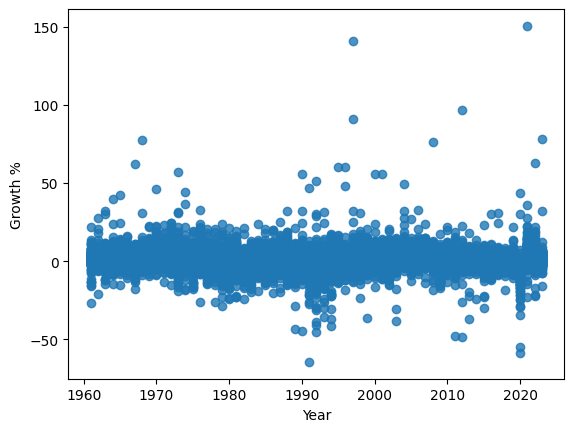

In [65]:
# Convert 'Year' column to a numeric type (int or float)
melted_gdp_world_df['Year'] = pd.to_numeric(melted_gdp_world_df['Year'])

sns.regplot(x="Year", y="Growth %", data=melted_gdp_world_df)
plt.ylim()

(-5.867473152934501, 123.21731351162451)

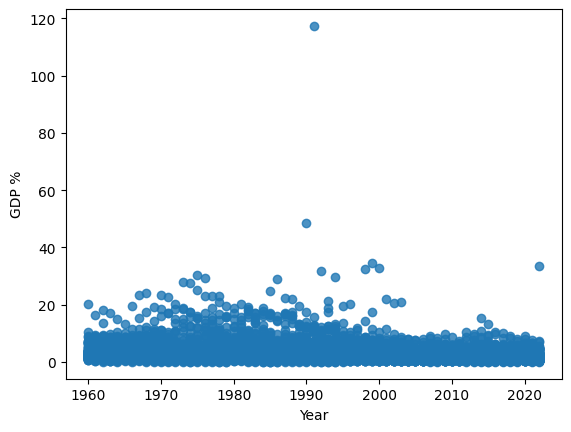

In [66]:
# Convert 'Year' column to a numeric type (int or float)
melted_military_world_df['Year'] = pd.to_numeric(melted_military_world_df['Year'])

sns.regplot(x="Year", y="GDP %", data=melted_military_world_df)
plt.ylim()

(-4.341950000000001, 108.67095)

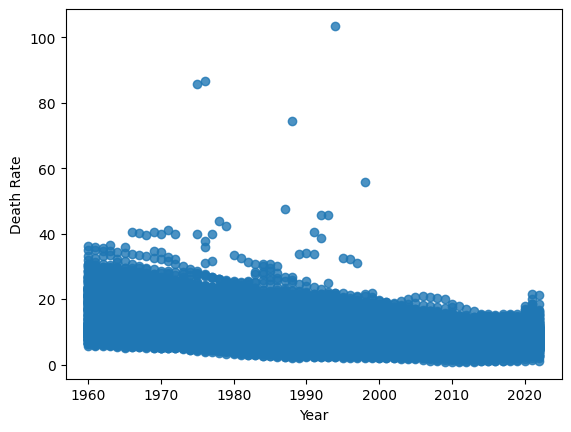

In [67]:
# Convert 'Year' column to a numeric type (int or float)
melted_death_world_df['Year'] = pd.to_numeric(melted_death_world_df['Year'])

sns.regplot(x="Year", y="Death Rate", data=melted_death_world_df)
plt.ylim()

(-3.1875, 66.9375)

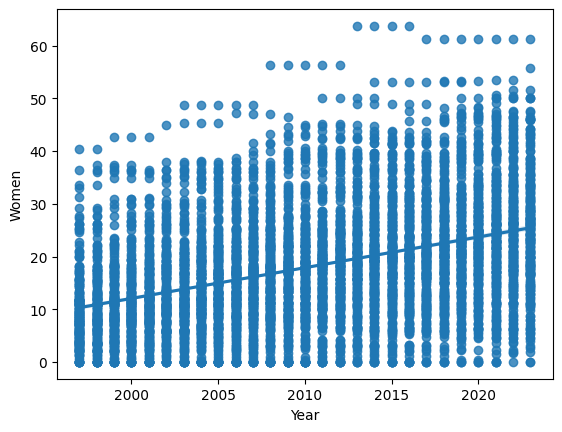

In [68]:
# Convert 'Year' column to a numeric type (int or float)
melted_women_world_df['Year'] = pd.to_numeric(melted_women_world_df['Year'])

sns.regplot(x="Year", y="Women", data=melted_women_world_df)
plt.ylim()

In [88]:
def determine_value_name(value_type):
    if value_type == 'GDP per capita growth (annual %)':
        return 'GDP_Growth %'
    elif value_type == 'Military expenditure (% of GDP)':
        return 'Military_GDP %'
    elif value_type == 'Death rate, crude (per 1,000 people)':
        return 'Death_Rate'
    elif value_type == 'Proportion of seats held by women in national parliaments (%)':
        return 'Women_in_Parliament %'
    else:
        return 'Unknown'

# Check if 'Indicator Name' is in the columns
if 'Indicator Name' in world_df.columns:
    indicator_column = 'Indicator Name'
else:
    # If not, assume it's the 3rd column (index 2)
    indicator_column = world_df.columns[2]

# Identify the year columns (assuming they start from the 5th column)
year_columns = world_df.columns[4:68]

# Melt the dataframe
melted_world_df = world_df.melt(
    id_vars=['Country Name', indicator_column],
    value_vars=year_columns,
    var_name='Year',
    value_name='Value'
)

# Apply the determine_value_name function directly to the melted dataframe
melted_world_df['Value_Type'] = melted_world_df[indicator_column].apply(determine_value_name)


df_grp = melted_world_df.groupby(indicator_column, as_index=False).first()
df_grp

,Indicator Name,Country Name,Year,Value,Value_Type
0,"Death rate, crude (per 1,000 people)",Aruba,1960,6.594000,Death_Rate
1,GDP per capita growth (annual %),Aruba,1960,-2.143065,GDP_Growth %
2,Military expenditure (% of GDP),Aruba,1960,1.550000,Military_GDP %
3,Proportion of seats held by women in national ...,Aruba,1960,11.828240,Women_in_Parliament %


In [93]:
def determine_value_name(value_type):
    if value_type == 'GDP per capita growth (annual %)':
        return 'GDP_Growth %'
    elif value_type == 'Military expenditure (% of GDP)':
        return 'Military_GDP %'
    elif value_type == 'Death rate, crude (per 1,000 people)':
        return 'Death_Rate'
    elif value_type == 'Proportion of seats held by women in national parliaments (%)':
        return 'Women_in_Parliament %'
    else:
        return 'Unknown'

# Assuming 'Indicator Name' is a column in your dataframe
indicator_column = 'Indicator Name'

# Filter the dataframe for United States and the year 2008
us_2008_df = world_df[world_df['Country Name'] == 'United States']

# Select only the columns we need
selected_columns = ['Country Name', indicator_column, '2008']
us_2008_df = us_2008_df[selected_columns]

# Melt the dataframe
melted_us_2008_df = us_2008_df.melt(
    id_vars=[indicator_column],
    value_vars=['2008'],
    var_name='Year',
    value_name='Value'
)

# Apply the determine_value_name function to create the Value_Type column
melted_us_2008_df['Value_Type'] = melted_us_2008_df[indicator_column].apply(determine_value_name)

# Reorder and select the columns we want to display
result_df = melted_us_2008_df[['Value_Type', 'Value']]

# Display the result
print(f"Country: United States")
print(f"Year: 2008")
print(result_df.to_string(index=False))

Country: United States
Year: 2008
           Value_Type     Value
         GDP_Growth % -0.828888
       Military_GDP %  4.446596
           Death_Rate  8.100000
Women_in_Parliament % 17.011494
